# Lecture 2: Rayleigh fractionation

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
# import the vapor pressure formulas by Murphy&Koop 2005 doi:10.1256/qj.04.94
from typhon.physics import e_eq_ice_mk,e_eq_water_mk


In [16]:
#%% fractionation factor empirical equations
# for a nice summary of different fractionation factors, see also: https://www.cambridge.org/core/journals/journal-of-glaciology/article/numerical-experiments-on-firn-isotope-diffusion-with-the-community-firn-model/AD8B85B8BCE7F0DB073CC1ABFFD2CB17
def alphaD_Ell(T):
    ''' fractionation factor for Deuterium alpha_ice/vapour (Ellehoj 2013) for Temp -40 - 0°C,
    input Temperature in C:'''
    # for alpha_vapour/ice simply 1/alphaD
    if np.any(T>0):
        print('ERROR alpha: T='+str(np.round(T,2))+' above 0 °C')    
    TK=T+273.15
    alphaD=np.exp(0.2133-(203.1/TK)+(48888/(TK**2)))
    return alphaD

def alphaD_MN(T):
    ''' fractionation factor for Deuterium alpha_ice/vapour (Merlivat & Nief 1967)
    -40°C bis 0°C, input Temperature in °C:'''
    if np.any(T>0):
        print('ERROR alpha: T='+str(np.round(T,2))+' above 0 °C')    
    # for alpha_vapour/ice simply 1/alphaD
    TK=T+273.15
    #log alphaD=-4.1*1e-2+(7.074/(T**2)) #the original in the paper using log(10)
    alphaD=np.exp(-9.45*1e-2+(16.289*1e3/(TK**2))) #also given in MN paper on page 125
    return alphaD

def alpha18O_Ell(T):
    ''' fractionation coefficient for 18O alpha_ice/vapour (Ellehoj 2013) for Temp -40 - 0°C
    input Temperature in C:'''
    # for alpha_vapour/ice simply 1/alpha18O
    if np.any(T>0):
        print('ERROR alpha: T='+str(np.round(T,2))+' above 0 °C')
    TK=T+273.15
    alpha18O=np.exp(0.0831-(49.192/TK)+(8312.5/(TK**2)))
    return alpha18O

def alpha18O_Maj(T):
    ''' fractionation coefficient for 18O alpha_ice/vapour (Majoube 1971b):
    from 0°C- -33.4°C,  Temp in K'''
    if np.any(T>0):
        print('ERROR alpha: T='+str(np.round(T,2))+' above 0 °C')
    #T in K 
    # for alpha_vapour/ice simply 1/alpha18O
    TK=T+273.15
    alpha18O=np.exp((11.839/TK)-28.224*1e-3)
    return alpha18O

def alpha18O_Maj_Tpos(T):
    ''' fractionation coefficient for 18O alpha_liquid/vapour (Majoube 1971a):
    from 0°C- 100°C,  Temp in K'''
    if np.any(T<0):
        print('ERROR alpha: T='+str(np.round(T,2))+' below 0 °C')
    #T in K 
    # for alpha_vapour/liquid simply 1/alpha18O
    TK=T+273.15
    alpha18O=np.exp((1137/(TK**2))-(0.4156/TK)-2.0667*1e-3)
    return alpha18O

def alphaD_Maj_Tpos(T):
    ''' fractionation coefficient for D alpha_liquid/vapour (Majoube 1971a):
    from 0°C- 100°C,  Temp in K'''
    if np.any(T<0):
        print('ERROR alpha: T='+str(np.round(T,2))+' below 0 °C')
    #T in K 
    # for alpha_vapour/liquid simply 1/alpha18O
    TK=T+273.15
    alphaD=np.exp((24844/TK**2)-(76.248/TK)+52.612*1e-3)
    return alphaD


# useful functions to turn R into delta and vice versa
def R18todelta(R):
    RVSMOW_18O=2005.2*1e-6 #+- 0.45
    return (R/RVSMOW_18O-1)*1000
    
def RDtodelta(R):
    RVSMOW_D=155.76*1e-6   # +-0.05 
    return (R/RVSMOW_D-1)*1000

def delta18toR(delta):
    RVSMOW_18O=2005.2*1e-6 #+- 0.45
    return (delta/1000+1)*RVSMOW_18O
    
def deltaDtoR(delta):
    RVSMOW_D=155.76*1e-6   # +-0.05 
    return (delta/1000+1)*RVSMOW_D

__Task 1.0: Play arounnd with the functions above and plot the different fractionation factors as a function of temperature__

In [23]:
delta=-35
delta18toR(delta)

0.001935018

In [47]:
# alpha_liquid/vapour
alphatest=alpha18O_Maj_Tpos(12)
print(alphatest)

#compute delta from delta with fractionation at 12 C
R18todelta(alpha18O_Maj_Tpos(12)*delta18toR(-40))



1.0105141406547635


-29.906424971427036

__Tipp: use a plotting function similar to the following template__

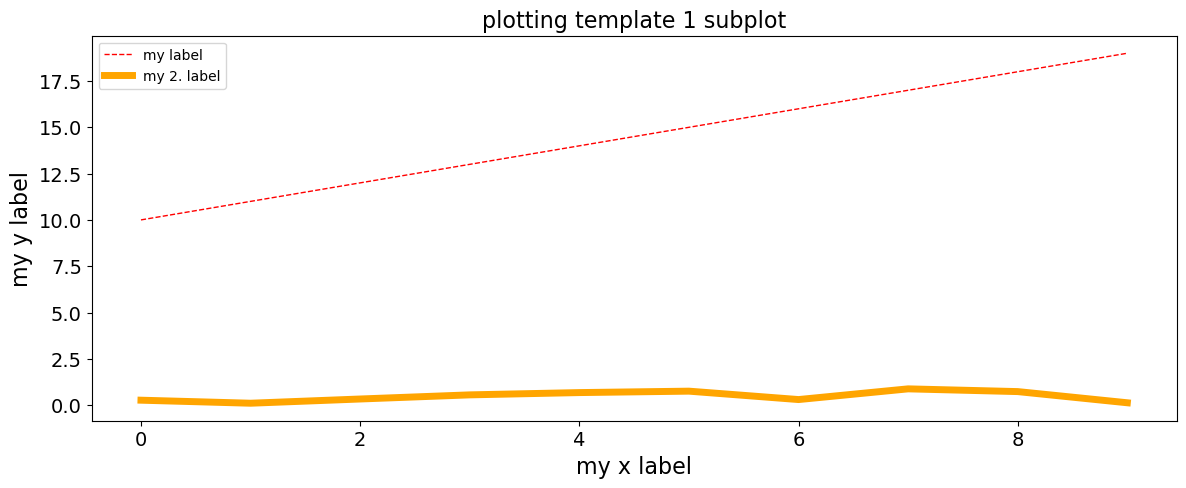

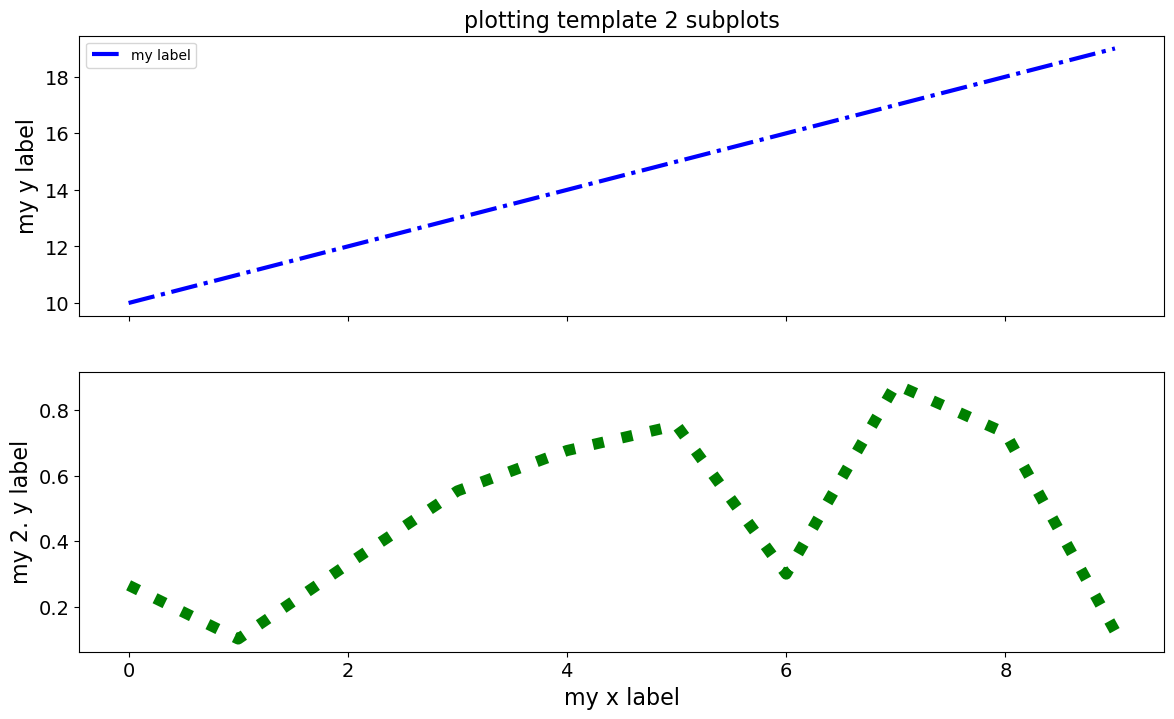

In [45]:
# for one subplot figures

x=np.arange(10)
y=np.arange(10,20)
x2=np.arange(10)
y2=np.random.rand(10)

fig,ax=plt.subplots(1,1,figsize=(14,5))
ax.plot(x,y,color='red',ls='--',lw=1,label='my label')
ax.plot(x2,y2,color='orange',ls='-',lw=5,label='my 2. label')

ax.set_xlabel('my x label', fontsize=16)
ax.set_ylabel('my y label', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.legend()
ax.set_title('plotting template 1 subplot', fontsize=16)
plt.show()


# for two subplot figures

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(14,8),sharex=True)
ax1.plot(x,y,color='blue',ls='-.',lw=3,label='my label')
ax2.plot(x2,y2,color='green',ls=':',lw=8,label='my 2. label')

ax2.set_xlabel('my x label', fontsize=16)
ax1.set_ylabel('my y label', fontsize=16)
ax2.set_ylabel('my 2. y label', fontsize=16)
ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)
ax1.legend()
ax1.set_title('plotting template 2 subplots', fontsize=16)
plt.show()

# The Rayleigh fractionation function

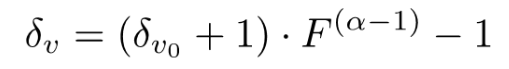
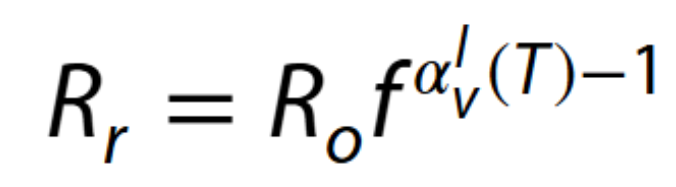

- R0, and delta_v0 are the initial vapor isotopic compositions
- F or f is the fraction of remaining vapor
- alpha is the temperature dependent fractionation coefficient, think about which definition to use
- T is Temperature of the air mass



__Task 1.1: Code a function for the Rayleigh distillation that takes Temperature, f and initial R0 (or delta0)as input__

Tipp: you can call a function in a function 

__Task 1.2: compute f as function of decreasing Temperature that assumes saturation at each temperature and the first entry is initial Temperature T0 when f=1__

Tipp: use the saturation vapor pressure functions from Typhon

__Task 1.3: compute the vapor isotopic composition at each step of the decreasing temperature, each time assuming saturation__

Tipp: Make sure that you use the right saturation vapor pressure and alpha functions for Temperatures above and below 0

__Task 1.4: Plot the vapor isotopic composition as function of remaining vapor fraction__

Tipp: You can decide if you want to use dD or d18O

__Task 1.5: Put it all together in one plot__


In [56]:
# functions for the Rayleigh fractionation model 
def rayleigh18O(T,delta18s0):    
    '''T is vector of temperatures (in C) with first entry being the intitial condition temperature, and subsequently decreasing temperatures
    delta18sO is initial ocean isotopic composition from which initial vapor isotopic composition is calculated at T0'''
    T0=T[0]
    #
    
    # remaining vapor fraction above zero
    maskpos=T>=0
    Psat0w=e_eq_water_mk(T0+273.15) # input in Kelvin
    Psatw=e_eq_water_mk(T[maskpos]+273.15)#
    fpos=Psatw/Psat0w # the ratio of remaining vapor fraction
    
    # remaining vapor fraction below zero
    maskneg=T<=0
    Psat0ice=e_eq_ice_mk(T[maskneg][0]+273.15)
    Psatice=e_eq_ice_mk(T[maskneg]+273.15)
    fneg=Psatice/Psat0ice
    fnegplot=Psatice/Psat0ice*fpos[-1]
    
    ftotal=np.append(fpos,fnegplot[1:])
    
    #initial vapor isotopic composition at temperature T0
    delta18v0=R18todelta(1/alpha18O_Maj_Tpos(T0)*delta18toR(delta18s0))
    
    delta18v0=delta18v0/1000

    # deltav positive temperatures
    delta18vpos=((delta18v0+1)*(fpos)**(alpha18O_Maj_Tpos(T[maskpos])-1)-1)*1000
    # the condensate isotopic composition
    delta18spos = (alpha18O_Maj_Tpos(T[maskpos])*(delta18vpos/1000+1)-1)*1000

    # vapor negative temp
    delta18v0neg=delta18vpos[-1]/1000
    delta18vneg=((delta18v0neg+1)*(fneg)**(alpha18O_Maj(T[maskneg])-1)-1)*1000
    # the condensate isotopic composition
    delta18sneg = (alpha18O_Maj(T[maskneg])*(delta18vneg/1000+1)-1)*1000

    # concatenate the vectors
    delta18vtotal=np.append(delta18vpos[:-1],delta18vneg)
    delta18stotal=np.append(delta18spos[:-1],delta18sneg)
    return delta18vtotal,delta18stotal,ftotal


def rayleighD(T,deltaDs0):    
    '''T is vector of temperatures (in C) with first entry being the intitial condition temperature
    deltaDsO is initial ocean isotopic composition from which initial vapor isotopic composition is calculated at T0'''
    T0=T[0]
    #
    
    # remaining vapor fraction above zero
    maskpos=T>=0
    Psat0w=e_eq_water_mk(T0+273.15) # input in Kelvin
    Psatw=e_eq_water_mk(T[maskpos]+273.15)#
    fpos=Psatw/Psat0w # the ratio of remaining vapor fraction
    
    # remaining vapor fraction below zero
    maskneg=T<=0
    Psat0ice=e_eq_ice_mk(T[maskneg][0]+273.15)
    Psatice=e_eq_ice_mk(T[maskneg]+273.15)
    fneg=Psatice/Psat0ice
    fnegplot=Psatice/Psat0ice*fpos[-1]
    
    ftotal=np.append(fpos,fnegplot[1:])
    
    #initial vapor isotopic composition at Temp T0
    deltaDv0=RDtodelta(1/alphaD_Maj_Tpos(T0)*deltaDtoR(deltaDs0))
    
    # delta v positive temperatures
    deltaDv0=deltaDv0/1000
    deltaDvpos=((deltaDv0+1)*(fpos)**(alphaD_Maj_Tpos(T[maskpos])-1)-1)*1000
    # the condensation isotopic composition at each step
    deltaDspos = (alphaD_Maj_Tpos(T[maskpos])*(deltaDvpos/1000+1)-1)*1000

    # vapor negative temp
    deltaDv0neg=deltaDvpos[-1]/1000
    deltaDvneg=((deltaDv0neg+1)*(fneg)**(alphaD_MN(T[maskneg])-1)-1)*1000

    # the condensation isotopic composition at each step
    deltaDsneg = (alphaD_MN(T[maskneg])*(deltaDvneg/1000+1)-1)*1000
    
    deltaDvtotal=np.append(deltaDvpos[:-1],deltaDvneg)
    deltaDstotal=np.append(deltaDspos[:-1],deltaDsneg)
    return deltaDvtotal,deltaDstotal,ftotal

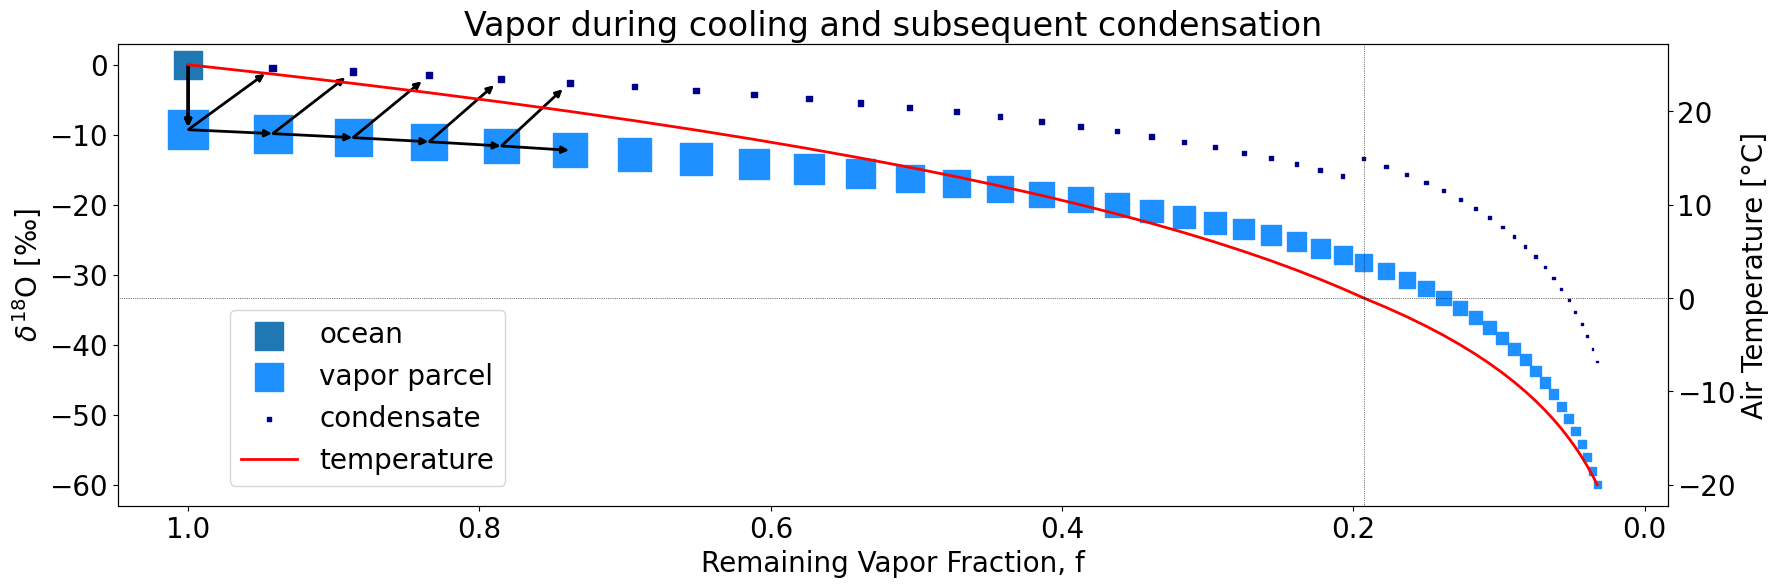

In [60]:
Ttest=np.flip(np.arange(-20.,26.,1))
delta18vtest,delta18stest,ftest=rayleigh18O(Ttest,delta18s0=0)

fig,ax1=plt.subplots(1,1,figsize=(20,6))
ax2=ax1.twinx()
a0=ax1.scatter(ftest[0],0,marker='s',s=400,label='ocean')
a1=ax1.scatter(ftest,delta18vtest,s=ftest*800,marker='s',color='dodgerblue',label='vapor parcel')
a2=ax1.scatter(ftest[1:],delta18stest[1:],s=(ftest[:-1]-ftest[1:])*400,marker='s',color='darkblue',label='condensate')
ax1.invert_xaxis()
a3=ax2.plot(ftest,Ttest,c='r',lw=2,label='temperature')
ax2.axhline(ls=':',lw=0.5,c='k')
ax2.axvline(ftest[np.where(Ttest==0)],ls=':',lw=0.5,c='k')
ax1.set_xlabel('Remaining Vapor Fraction, f',fontsize=20)
ax1.set_ylabel(r'$\delta^{18}$O [‰]',fontsize=20)
ax2.set_ylabel('Air Temperature [°C]',fontsize=20)
ax1.tick_params(axis='both', labelsize=20)
ax2.tick_params(axis='both', labelsize=20)

for i in np.arange(0,len(ftest[0:5])):
    ax1.annotate("",xy=(ftest[i+1], delta18stest[i+1]), xycoords='data',
                xytext=(ftest[i], delta18vtest[i]), textcoords='data',
                arrowprops=dict(arrowstyle="-|>", lw=2,color='k',shrinkA=0.5,shrinkB=7))
    ax1.annotate("",xy=(ftest[i+1], delta18vtest[i+1]), xycoords='data',
                xytext=(ftest[i], delta18vtest[i]), textcoords='data',
                arrowprops=dict(arrowstyle="-|>", lw=2,connectionstyle="arc3",color='k',shrinkA=0.5,shrinkB=0.5),)
    
    
    ax1.annotate("",xy=(ftest[0], delta18vtest[1]), xycoords='data',
                xytext=(ftest[0], delta18stest[0]), textcoords='data',
                arrowprops=dict(arrowstyle="-|>", lw=2,color='k',connectionstyle="arc3",shrinkA=0.5,shrinkB=5))

ax1.set_title('Vapor during cooling and subsequent condensation',fontsize=24)
fig.legend(fontsize=20,bbox_to_anchor=[0.25, 0.29], loc='center',  bbox_transform=fig.transFigure,frameon=True)


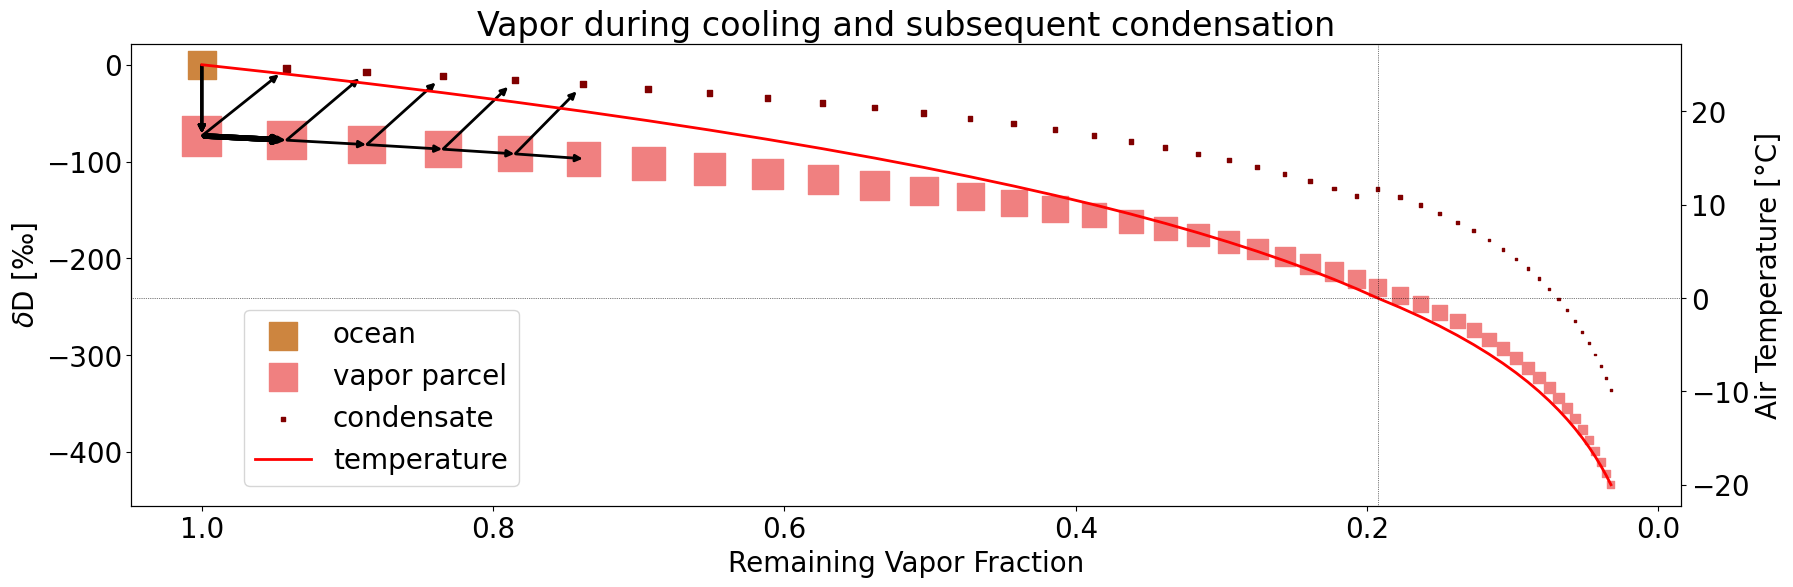

In [62]:
Ttest=np.flip(np.arange(-20.,26.,1))
deltaDvtest,deltaDstest,ftest=rayleighD(Ttest,deltaDs0=0)

fig,ax1=plt.subplots(1,1,figsize=(20,6))
ax2=ax1.twinx()
a0=ax1.scatter(ftest[0],0,marker='s',s=400,label='ocean',color='peru')
a1=ax1.scatter(ftest,deltaDvtest,s=ftest*800,marker='s',color='lightcoral',label='vapor parcel')
a2=ax1.scatter(ftest[1:],deltaDstest[1:],s=(ftest[:-1]-ftest[1:])*400,marker='s',color='maroon',label='condensate')
ax1.invert_xaxis()
a3=ax2.plot(ftest,Ttest,c='r',lw=2,label='temperature')
ax2.axhline(ls=':',lw=0.5,c='k')
ax2.axvline(ftest[np.where(Ttest==0)],ls=':',lw=0.5,c='k')
ax1.set_xlabel('Remaining Vapor Fraction',fontsize=20)
ax1.set_ylabel(r'$\delta$D [‰]',fontsize=20)
ax2.set_ylabel('Air Temperature [°C]',fontsize=20)
ax1.tick_params(axis='both', labelsize=20)
ax2.tick_params(axis='both', labelsize=20)

for i in np.arange(0,len(ftest[0:5])):
    ax1.annotate("",xy=(ftest[i+1], deltaDstest[i+1]), xycoords='data',
                xytext=(ftest[i], deltaDvtest[i]), textcoords='data',
                arrowprops=dict(arrowstyle="-|>", lw=2,color='k',shrinkA=0.5,shrinkB=7))
    ax1.annotate("",xy=(ftest[i+1], deltaDvtest[i+1]), xycoords='data',
                xytext=(ftest[i], deltaDvtest[i]), textcoords='data',
                arrowprops=dict(arrowstyle="-|>", lw=2,connectionstyle="arc3",color='k',shrinkA=0.5,shrinkB=0.5),)
    
    
    ax1.annotate("",xy=(ftest[0], deltaDvtest[1]), xycoords='data',
                xytext=(ftest[0], deltaDstest[0]), textcoords='data',
                arrowprops=dict(arrowstyle="-|>", lw=2,color='k',connectionstyle="arc3",shrinkA=0.5,shrinkB=5))
    ax1.annotate("",xy=(ftest[1], deltaDvtest[1]), xycoords='data',
                xytext=(ftest[0], deltaDvtest[0]), textcoords='data',
                arrowprops=dict(arrowstyle="->", lw=4,connectionstyle="arc3"),)

ax1.set_title('Vapor during cooling and subsequent condensation',fontsize=24)
fig.legend(fontsize=20,bbox_to_anchor=[0.25, 0.29], loc='center',  bbox_transform=fig.transFigure,frameon=True)#facecolor='white',framealpha=1)
#fig.savefig('path_to_file.png',dpi=150) # use this if you want to save the figure as png